In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df = df.drop(['Unnamed: 0', 'year', 'month'], axis=1)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [7]:
import seaborn as sns

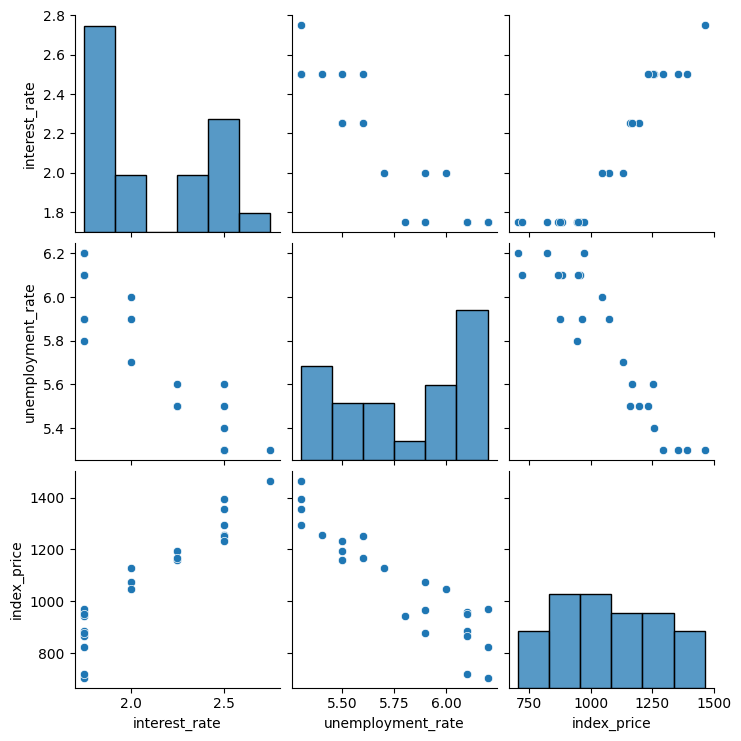

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)      

LinearRegression()

In [31]:
regression.coef_

array([  96.28689501, -101.57024663])

In [14]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [15]:
validation_score

array([ -8717.80560752, -14492.68332185,  -2542.85216034])

In [16]:
np.mean(validation_score)

np.float64(-8584.447029905596)

In [17]:
pred = regression.predict(X_test)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

mse, mae, rmse


(np.float64(5088.329958294002),
 np.float64(58.95987629034907),
 np.float64(71.3325308558024))

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.8640024299625206

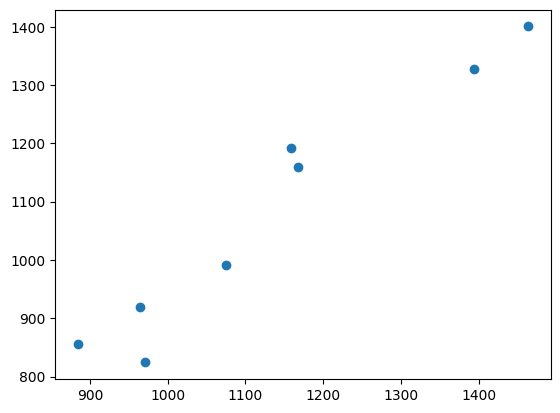

In [20]:
plt.scatter(y_test, pred)

In [21]:
residuals = y_test - pred
y_test, pred

(8     1159
 16     971
 0     1464
 18     884
 11    1075
 9     1167
 13     965
 1     1394
 Name: index_price, dtype: int64,
 array([1192.13083729,  824.23971817, 1400.41971162,  856.16016713,
         992.22505325, 1160.21038833,  920.00106505, 1328.19572341]))

In [22]:
residuals


8     -33.130837
16    146.760282
0      63.580288
18     27.839833
11     82.774947
9       6.789612
13     44.998935
1      65.804277
Name: index_price, dtype: float64

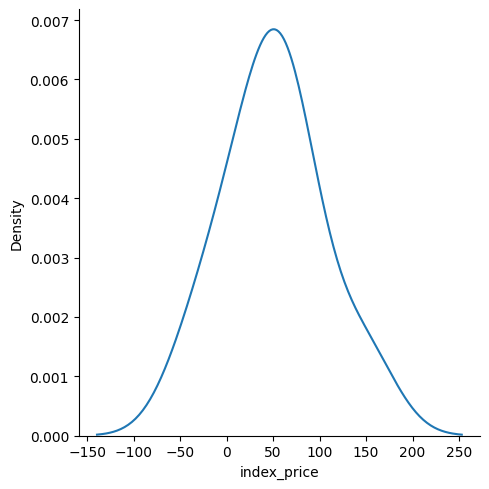

In [23]:
sns.displot(residuals, kind='kde')

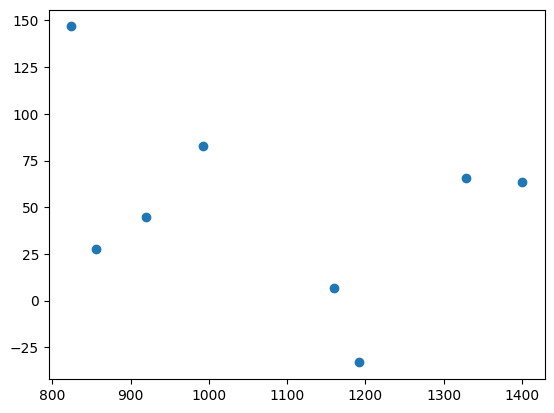

In [26]:
plt.scatter(pred, residuals)
## this chart help us to validate if there are any pattern being formed 

In [29]:
# %pip install statsmodels
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [30]:
model.summary()

c:\Users\ucant\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.105
Method:                 Least Squares   F-statistic:                             0.2425
Date:                Tue, 01 Oct 2024   Prob (F-statistic):                       0.788
Time:                        13:55:00   Log-Likelihood:                         -133.85
No. Observations:                  16   AIC:                                      271.7
Df Residuals:                      14   BIC:                                      273.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            96.2869    682.952      0.141      0.890   -1368.500    1561.074
x2          -101.5702    682.952     -0.149      0.884   -1566.357    1363.216
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.412
Skew:                          -0.327   Prob(JB):                        0.814
Kurtosis:                       2.563   Cond. No.                         4.70
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(regression.coef_)

[  96.28689501 -101.57024663]
